In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [818]:
path = 'athlete_events.csv'
orig_df = pd.read_csv(path)
orig_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
orig_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [87]:
data = orig_df[orig_df['Age'] >50].groupby('Sport').size().reset_index(name='Count')
data.sort_values('Count',ascending=True,inplace=True)

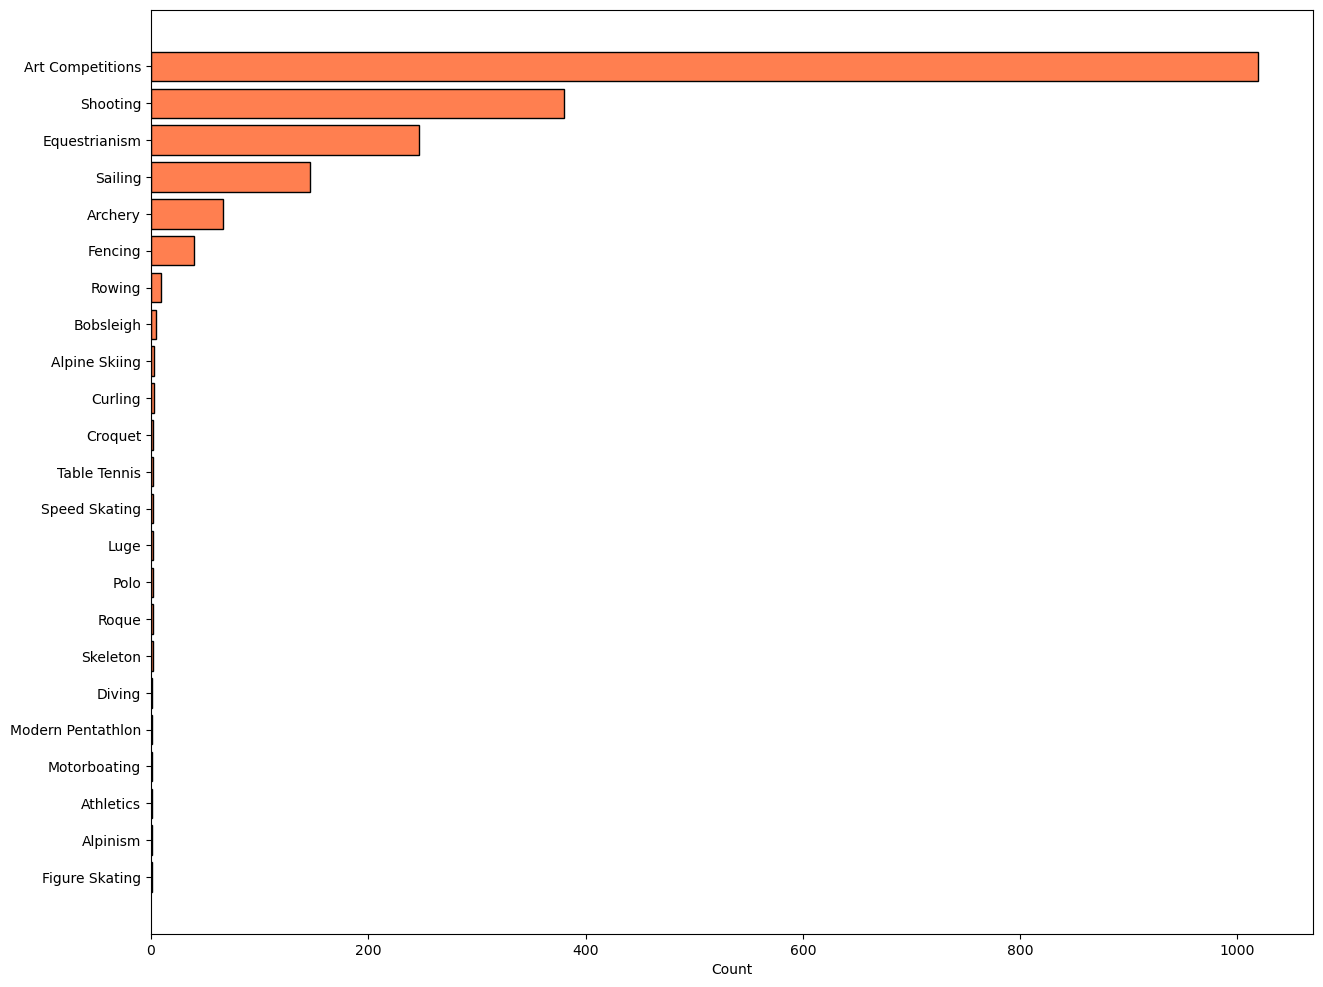

In [103]:
plt.figure(figsize=(15,12))

plt.barh(data['Sport'],data['Count'],edgecolor='black',color='coral')
plt.xlabel('Count')
plt.show()

In [10]:
data1 = orig_df[(orig_df['Sex']=='F') & (orig_df['Age'] > 50)].groupby('Sport').size().reset_index(name='Count')
data1

,Sport,Count
0,Archery,12
1,Art Competitions,97
2,Equestrianism,60
3,Fencing,1
4,Rowing,3
5,Shooting,18
6,Table Tennis,1


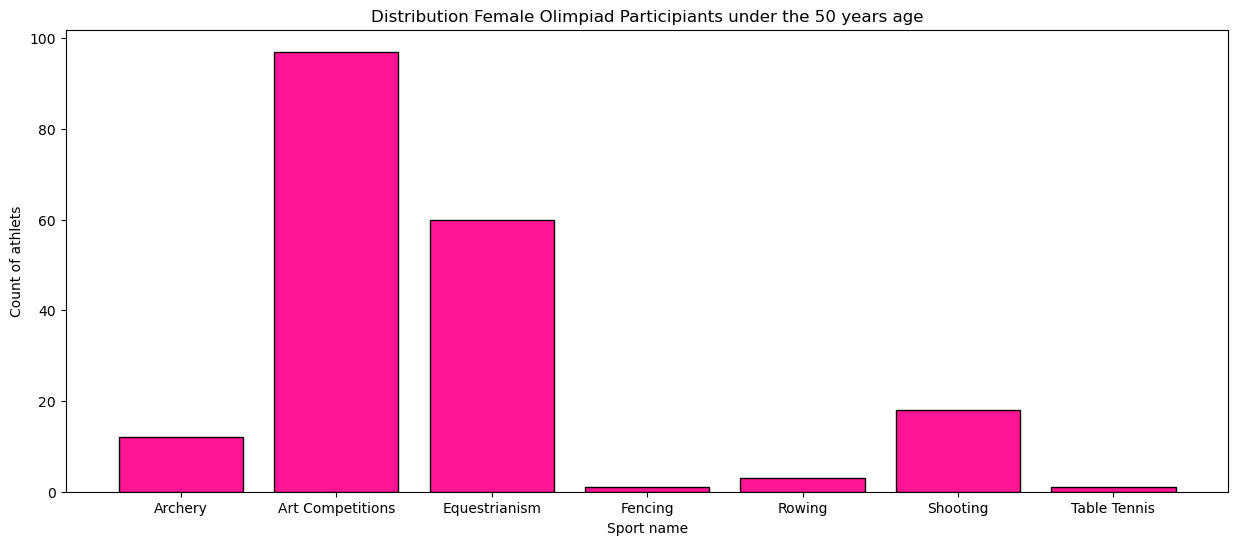

In [11]:
plt.figure(figsize=(15,6))


plt.bar(data1['Sport'],data1['Count'], edgecolor='black', color='deeppink')
plt.xlabel('Sport name')
plt.ylabel('Count of athlets')
plt.title('Distribution Female Olimpiad Participiants under the 50 years age')
plt.show()

In [19]:
data2 = orig_df[(orig_df['Sex']=='M') & (orig_df['Age'] > 50)]
data2 = data2.groupby('Sport').size().reset_index(name='Count')
data2 = data2.sort_values('Count',ascending=True).reset_index()
data2

,index,Sport,Count
0,11,Figure Skating,1
1,14,Motorboating,1
2,13,Modern Pentathlon,1
3,8,Diving,1
4,22,Table Tennis,1
5,4,Athletics,1
6,1,Alpinism,1
7,6,Croquet,2
8,20,Skeleton,2
9,16,Roque,2


In [2]:
plt.figure(figsize=(15,12))
plt.barh(data2['Sport'],data2['Count'],edgecolor='black',color='royalblue')
plt.xlabel('Participiants',fontsize=14)
plt.title('Distribution Male Olimpiad Participiants under the 50 years age', fontsize=14)
plt.show()

NameError: name 'plt' is not defined

In [547]:
data3 = orig_df[orig_df['Weight'] > 120].groupby('Sport').size().reset_index(name='Count')
data3 = data3.sort_values('Count',ascending=True)

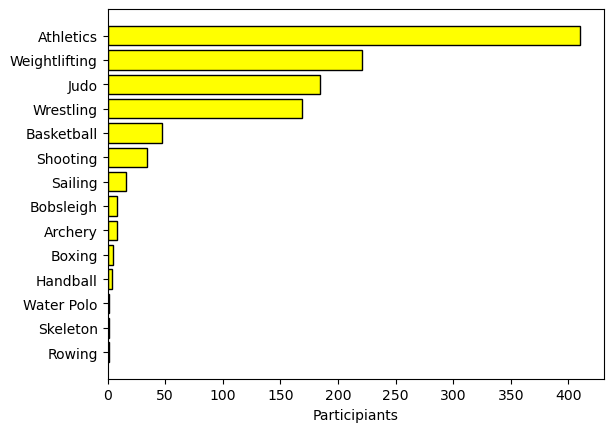

In [549]:
plt.barh(data3['Sport'],data3['Count'],color='yellow',edgecolor='black')
plt.xlabel('Participiants')
plt.show()

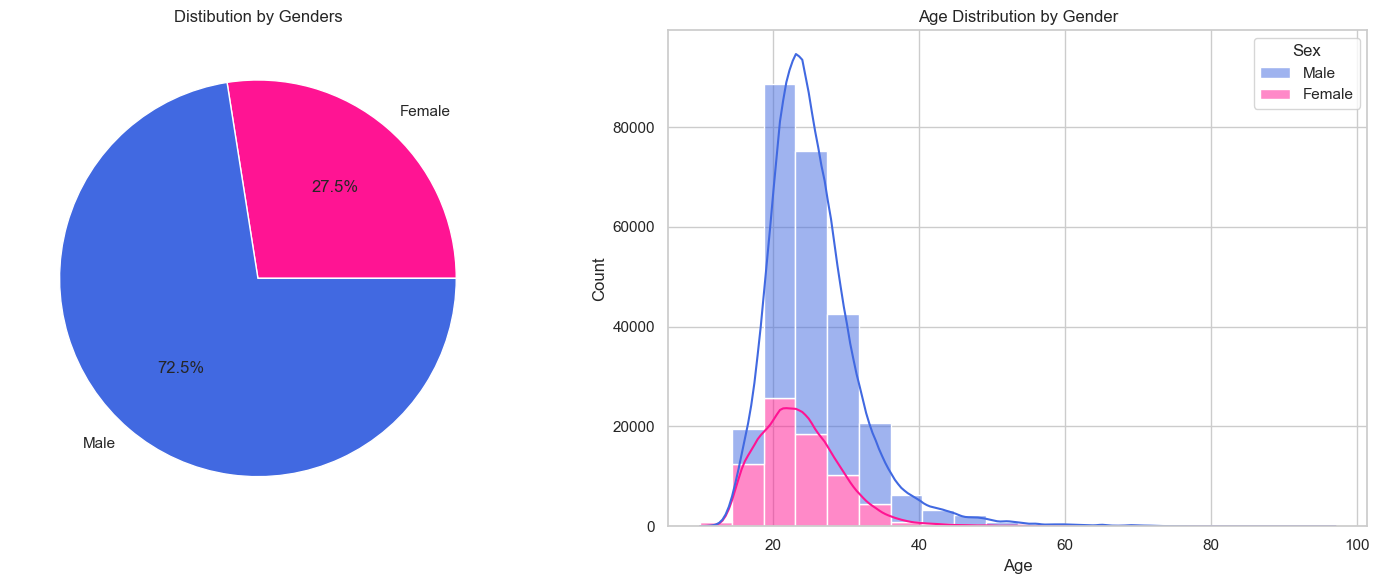

In [750]:

sns.set(style="whitegrid")

task1 = orig_df.copy()
task1 = task1.groupby('Sex').size().reset_index(name='Count')
task1['Sex'] = task1['Sex'].replace({'F': 'Female',
                                     'M': 'Male'})
task1_1 = orig_df.copy()
task1_1['Sex'] = task1_1['Sex'].replace({'F':'Female',
                                         'M':'Male'})

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(task1['Count'],labels=task1['Sex'],colors=['deeppink','royalblue'], autopct='%.1f%%')
plt.title('Distibution by Genders')

plt.subplot(1,2,2)
sns.histplot(data=task1_1, x='Age', hue='Sex', kde=True, palette={'Male':'royalblue', 'Female':'deeppink'}, multiple='stack', bins=20)

plt.title('Age Distribution by Gender')

plt.tight_layout()
plt.show()

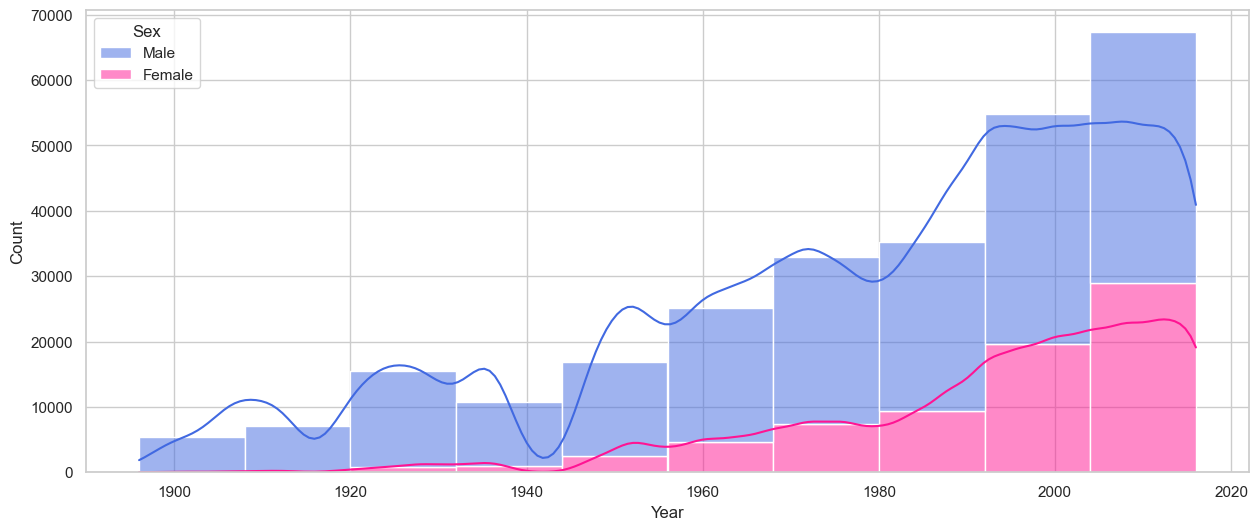

In [200]:
sns.set(style="whitegrid")

task2_1 = orig_df.copy()
task2_1['Sex'] = pd.DataFrame(task2_1['Sex']).replace({'F':'Female',
                                                       'M':'Male'})

task2_1_grouped = task2_1.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Создаем график
plt.figure(figsize=(15, 6))

sns.histplot(data=task2_1, x='Year', hue='Sex', kde=True, palette={'Male':'royalblue', 'Female':'deeppink'}, multiple='stack', bins=10)

plt.show()

In [198]:
# Saparate into two labels who won 
who_won_medal = orig_df[pd.notna(orig_df['Medal'])]

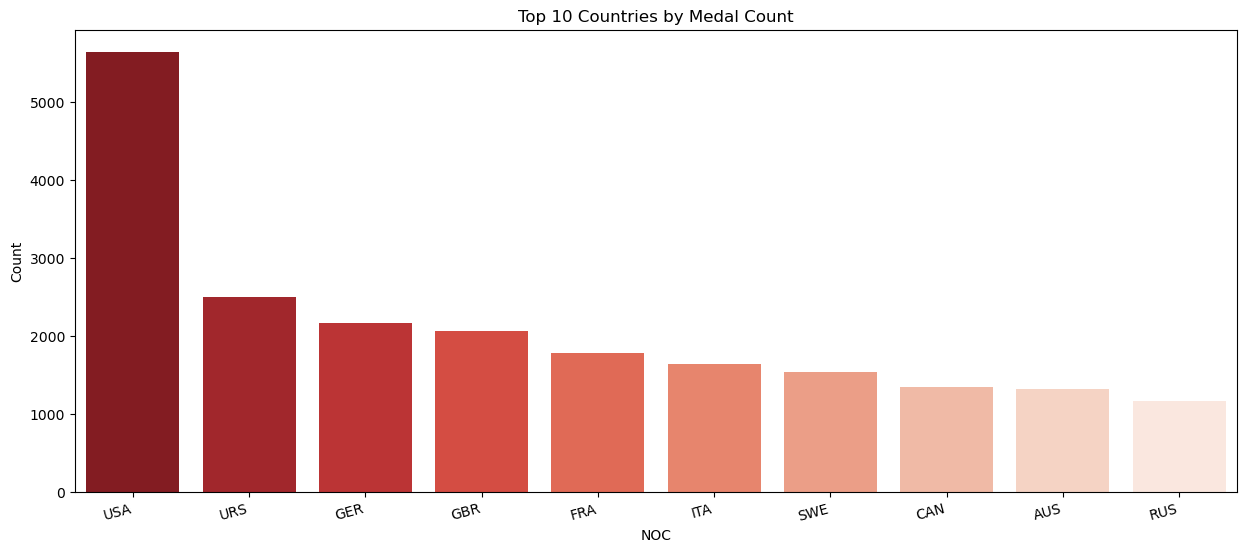

In [288]:
data5 = who_won_medal.groupby('NOC')['Medal'].size().reset_index(name='Count')
top_10 = data5.nlargest(10, 'Count')

plt.figure(figsize=(15, 6))

top_colors = sns.color_palette("Reds", n_colors=len(top_10))
top_colors = [top_colors[i] for i in np.argsort(top_10['Count'].values)]

sns.barplot(x='NOC', y='Count', data=top_10, hue='NOC', palette=top_colors, legend=False)
plt.title('Top 10 Countries by Medal Count')
plt.xticks(rotation=15, ha='right')
plt.show()

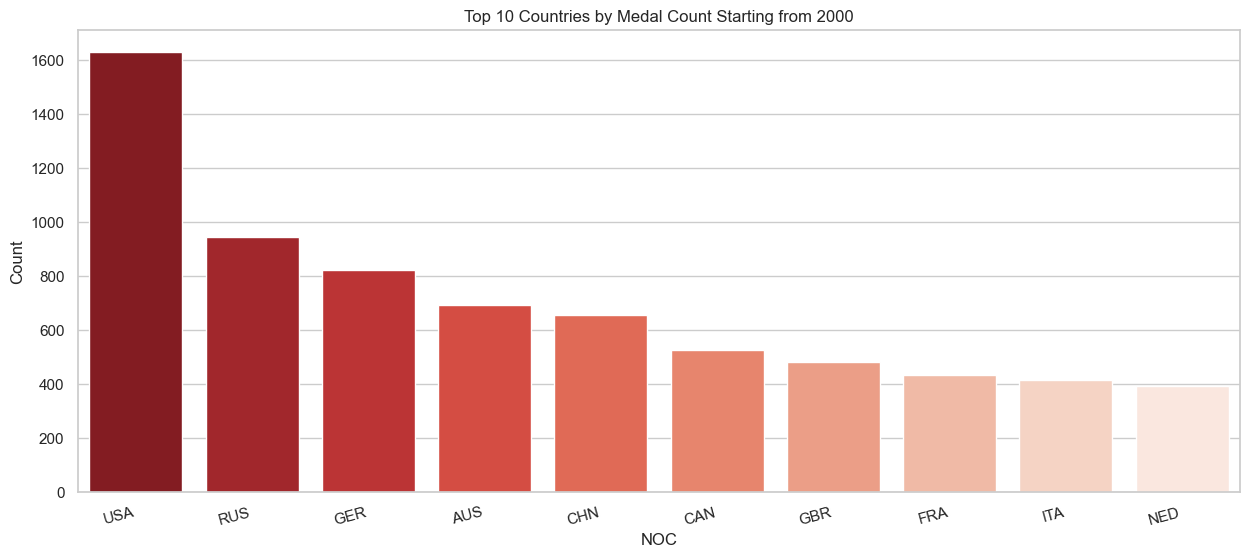

In [912]:
data13 = who_won_medal[who_won_medal['Year']>=2000].groupby('NOC')['Medal'].size().reset_index(name='Count')
top_10 = data13.nlargest(10, 'Count')

plt.figure(figsize=(15, 6))

top_colors = sns.color_palette("Reds", n_colors=len(top_10))
top_colors = [top_colors[i] for i in np.argsort(top_10['Count'].values)]

sns.barplot(x='NOC', y='Count', data=top_10, hue='NOC', palette=top_colors, legend=False)
plt.title('Top 10 Countries by Medal Count Starting from 2000')
plt.xticks(rotation=15, ha='right')
plt.show()

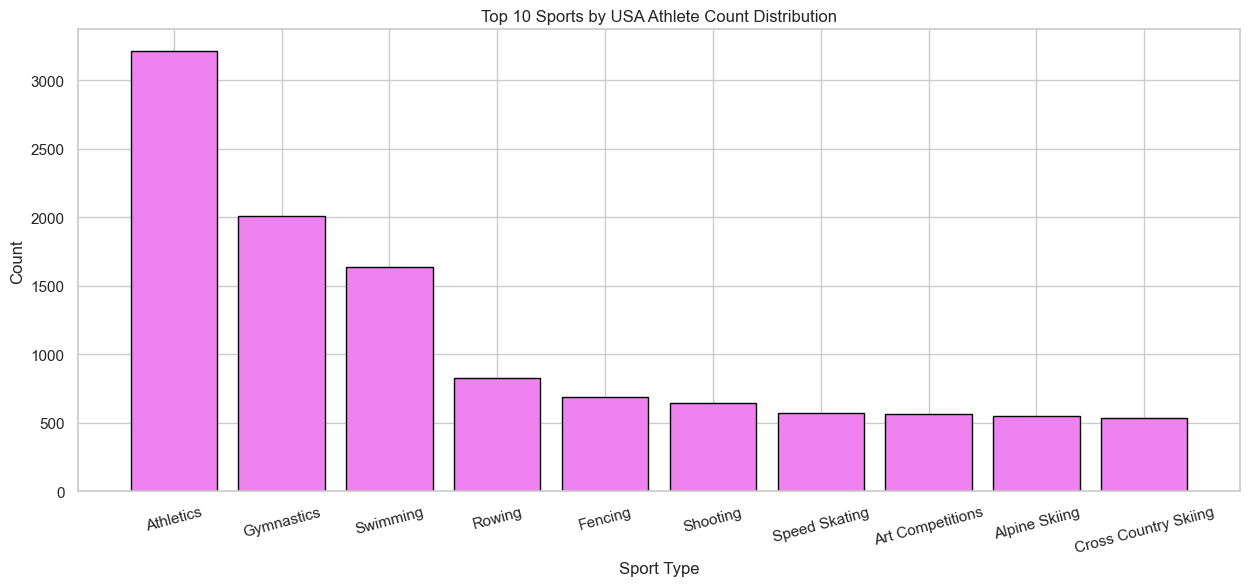

In [934]:
data7_1 = orig_df[orig_df['NOC']=='USA'].copy()
data7_1 = data7_1.groupby('Sport').size().reset_index(name='Count')
data7_1= data7_1.sort_values('Count',ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(data7_1['Sport'],data7_1['Count'],edgecolor='black',color='violet')
plt.xlabel('Sport Type')
plt.ylabel('Count')
plt.title('Top 10 Sports by USA Athlete Count Distribution')
plt.xticks(rotation=15)
plt.show()

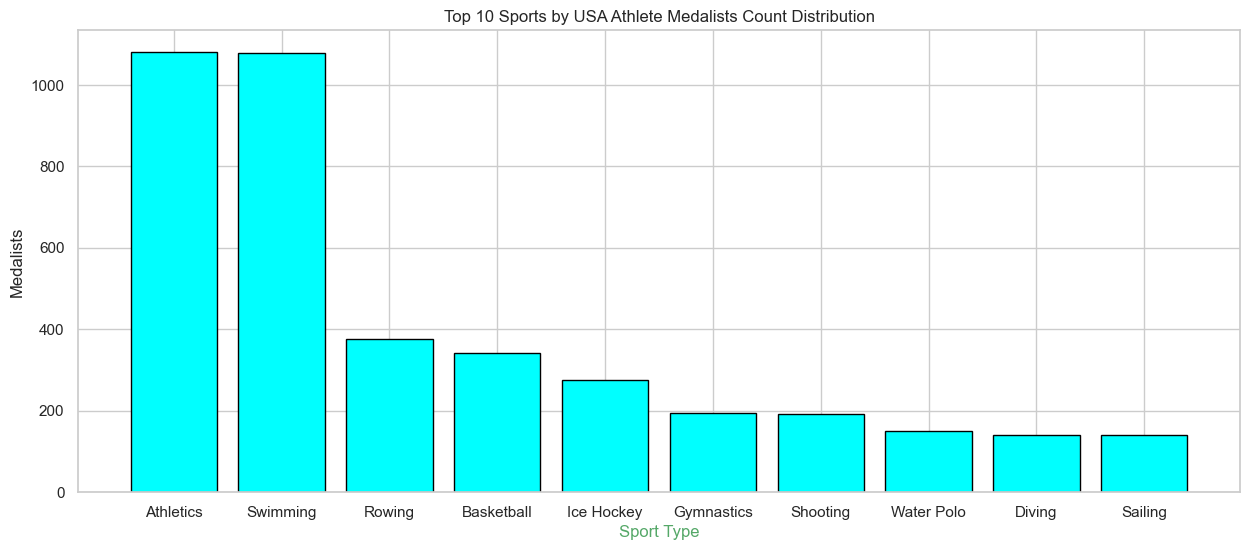

In [936]:
data7_0 = who_won_medal[who_won_medal['NOC']=='USA'].copy()
data7_0 = data7_0.groupby('Sport').size().reset_index(name='Count')
data7_0= data7_0.sort_values('Count',ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(data7_0['Sport'],data7_0['Count'],edgecolor='black',color='aqua')
plt.xlabel('Sport Type',c='g')
plt.ylabel('Medalists',)
plt.title('Top 10 Sports by USA Athlete Medalists Count Distribution')
plt.show()

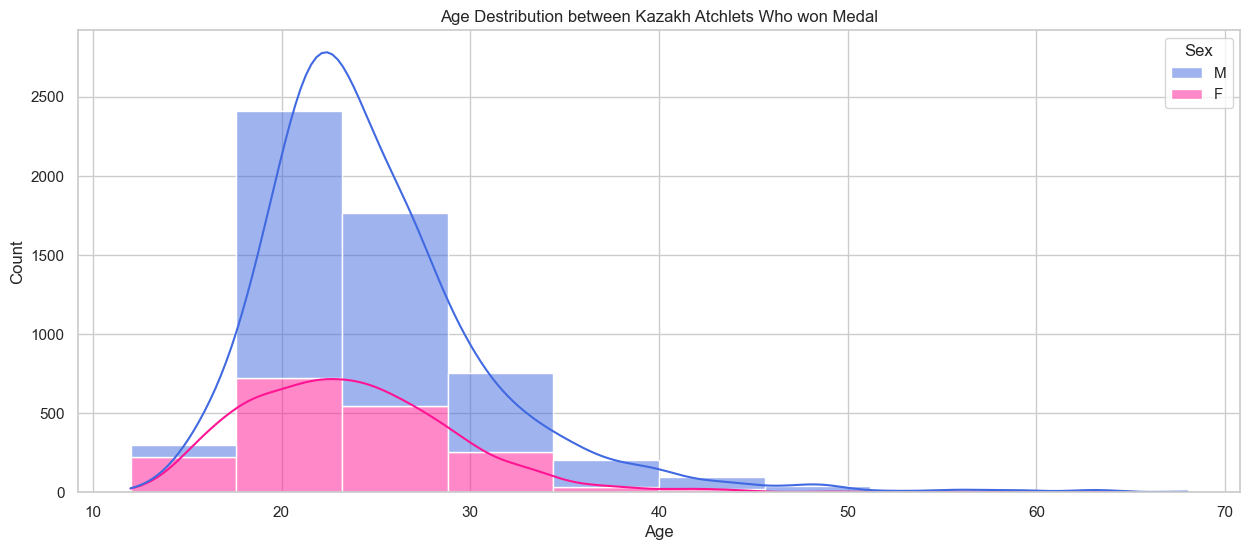

In [938]:
data7_2 = who_won_medal[who_won_medal['NOC']=='USA'].copy()
data7_2['Sex'] = data7_2['Sex'].rename({'M':'Male','F':'Female'})

plt.figure(figsize=(15, 6))

sns.histplot(data=data7_2, x='Age', hue='Sex', kde=True, palette=['royalblue','deeppink'], multiple='stack', bins=10,legend=1)
plt.title('Age Destribution between Kazakh Atchlets Who won Medal')
plt.show()

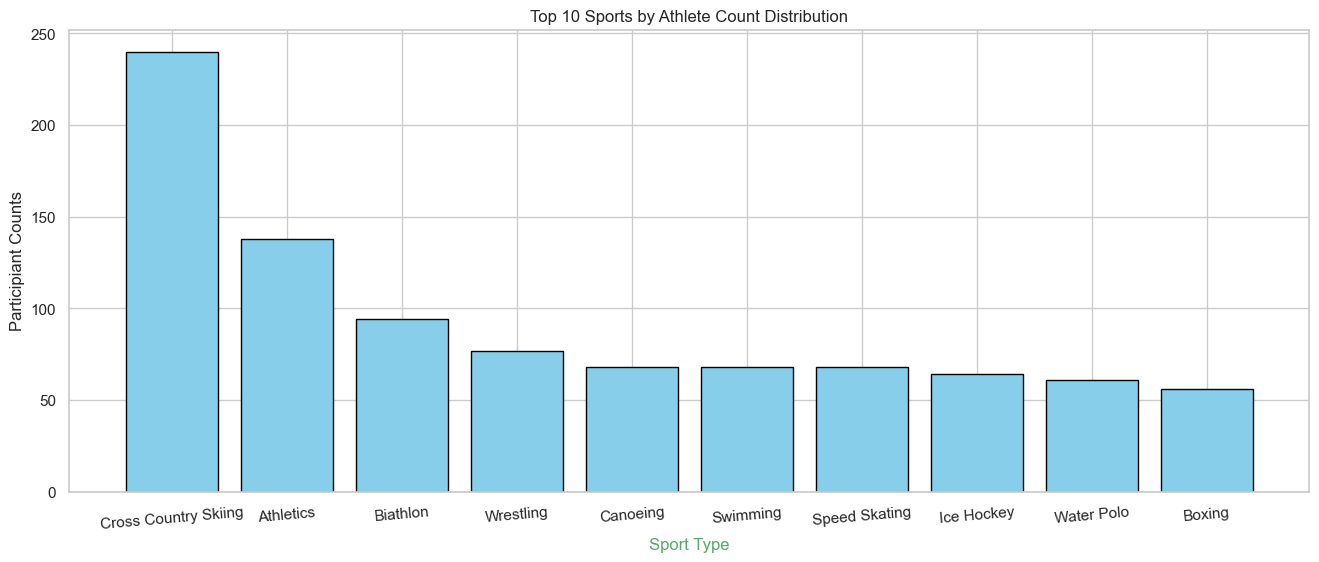

In [901]:
# 🇰🇿🚀

data6_0 = orig_df[orig_df['NOC']=='KAZ'].copy()

data6_0 = data6_0.groupby('Sport').size().reset_index(name='Count')

data6_0 = data6_0.sort_values('Count',ascending=False).head(10)

plt.figure(figsize=(16,6))

plt.bar(data6_0['Sport'],data6_0['Count'],edgecolor='black',color='skyblue')
plt.title('Top 10 Sports by Athlete Count Distribution')
plt.xlabel('Sport Type',color='g')
plt.ylabel('Participiant Counts')
plt.xticks(rotation=5)

plt.show()

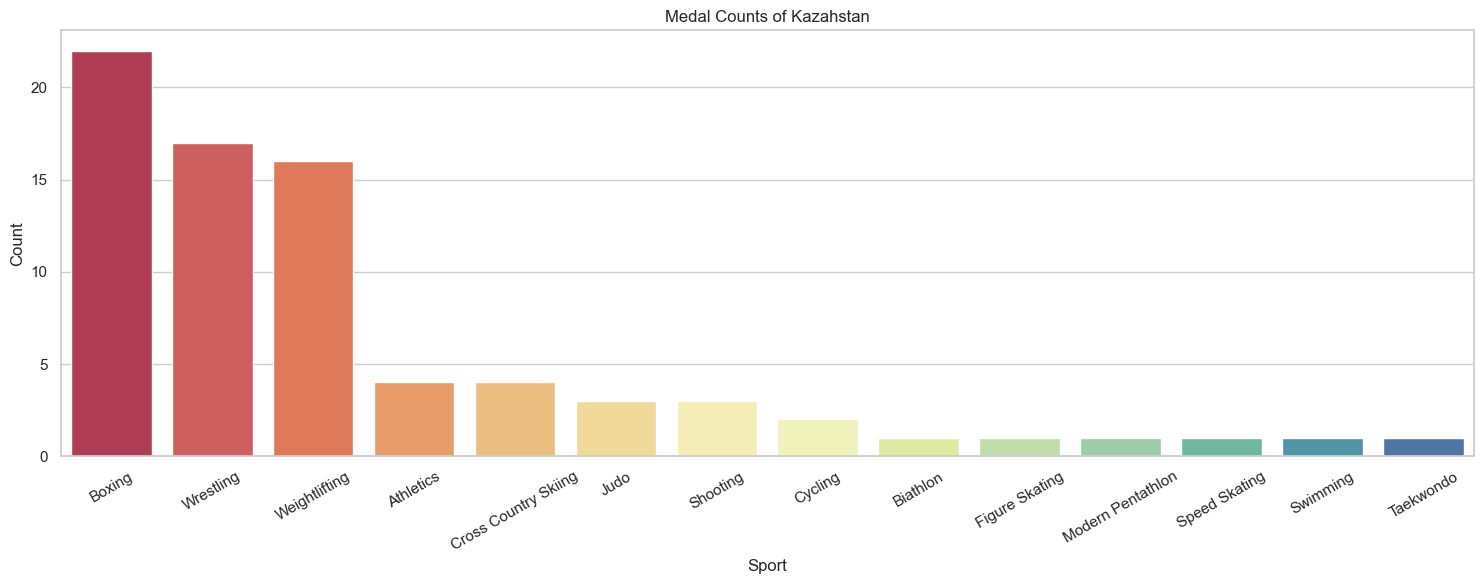

In [802]:
#🇰🇿🚀

data6 = who_won_medal[who_won_medal['NOC']=='KAZ']
data6 = data6.groupby('Sport').size().reset_index(name='Count')
data6 = data6.sort_values('Count',ascending=False)

plt.figure(figsize=(15, 6))

# Create a color palette and sort it based on 'Count'
colors_ = sns.color_palette("Spectral", n_colors=len(data6))

# Plot the bar chart
sns.barplot(x='Sport', y='Count', data=data6, hue='Sport', palette=colors_, legend=False)
plt.title('Medal Counts of Kazahstan')
plt.xticks(rotation=30)

# Show the plot
plt.tight_layout()
plt.show()

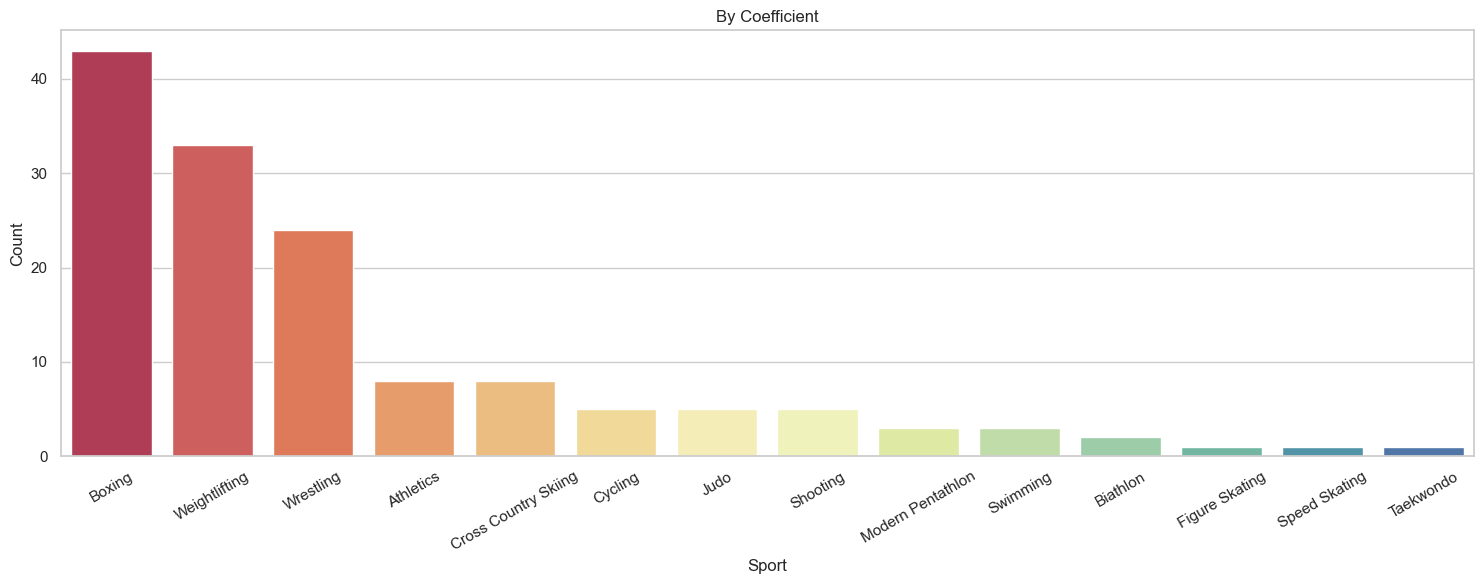

In [860]:
# 🇰🇿🚀

data6_1 = who_won_medal[who_won_medal['NOC']=='KAZ'].copy()
data6_1['Coeffcient'] = data6_1['Medal'].map({'Gold':3,'Silver':2,'Bronze':1})
data6_1 = data6_1.groupby('Sport')['Coeffcient'].sum().reset_index(name='Count')
data6_1 = data6_1.sort_values('Count',ascending=False)


color_6_1 = sns.color_palette('Spectral', n_colors=len(data6_1))

plt.figure(figsize=(15,6))
sns.barplot(x='Sport',y='Count',data=data6_1, hue= 'Sport' , palette=color_6_1)
plt.xticks(rotation=30)

plt.title('By Coefficient')

plt.tight_layout()
plt.show()

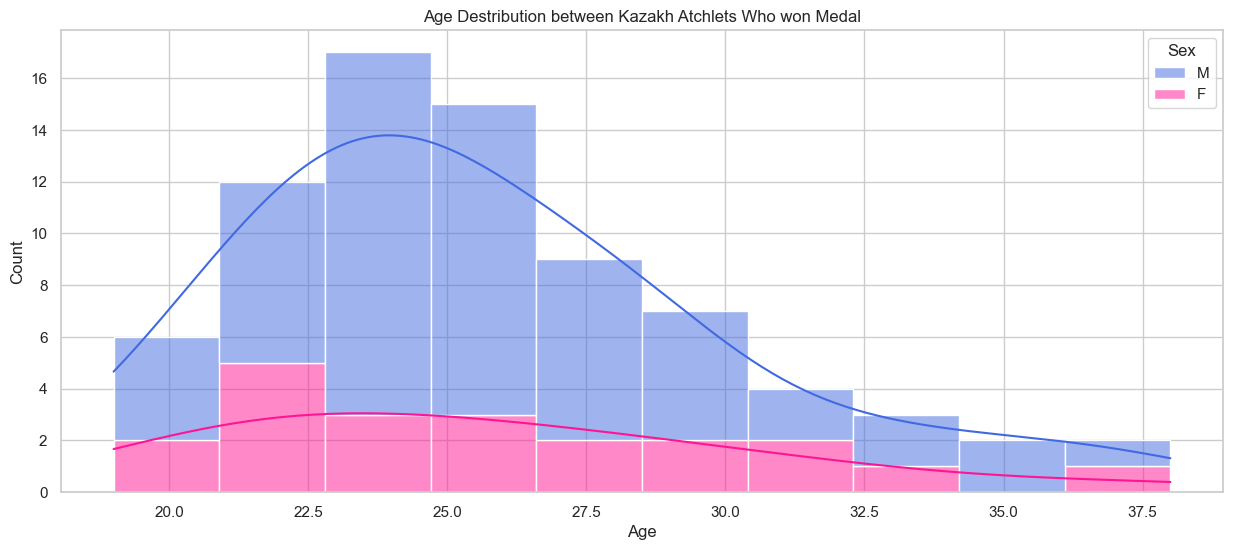

In [858]:
# 🇰🇿🚀
data6_2 = who_won_medal[who_won_medal['NOC']=='KAZ'].copy()
data6_2['Sex'] = data6_2['Sex'].rename({'M':'Male','F':'Female'})

plt.figure(figsize=(15, 6))

sns.histplot(data=data6_2, x='Age', hue='Sex', kde=True, palette=['royalblue','deeppink'], multiple='stack', bins=10,legend=1)
plt.title('Age Destribution between Kazakh Atchlets Who won Medal')
plt.show()

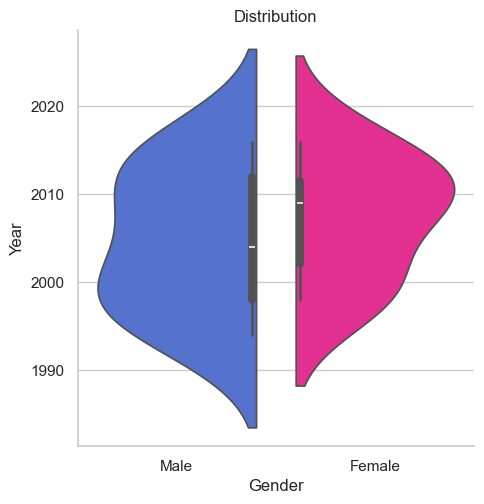

In [838]:
# 🇰🇿🚀

data7 = who_won_medal[who_won_medal['NOC']=='KAZ'][['Year','Sex']].value_counts().reset_index(name='Count')
data7['Sex'] = data7['Sex'].replace({'M':'Male','F':'Female'})
data7 = data7.rename(columns={'Sex':'Gender'})


sns.catplot(x='Gender',y='Year',hue='Gender',data=data7, palette=['royalblue','deeppink'], kind='violin',split=True)
plt.title('Distribution')

plt.show()

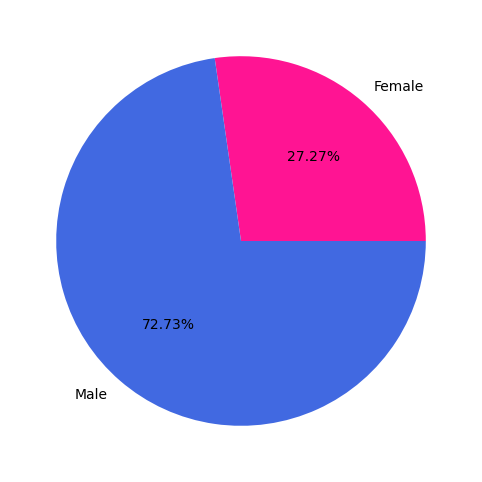

In [475]:
data8 = data7.groupby('Gender')['Count'].sum().reset_index(name='Gender Sum')

plt.figure(figsize=(12,6))
plt.pie(data8['Gender Sum'],labels=data8['Gender'],colors=['deeppink','royalblue'],autopct='%.2f%%')
plt.show()

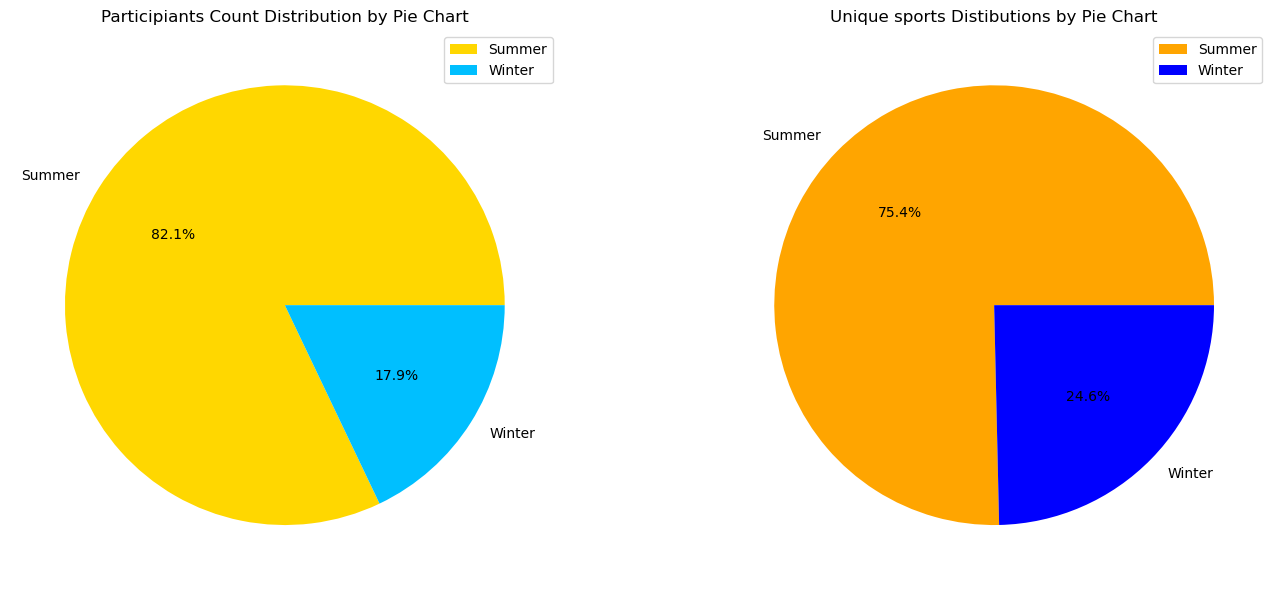

In [653]:
# Year >= 2004

winter_game = orig_df[(orig_df['Season']=='Winter')].copy()
summer_game = orig_df[(orig_df['Season']=='Summer')].copy()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
data9 = orig_df['Season'].value_counts().reset_index()
plt.pie(data9['count'], labels=data9['Season'], colors=['gold','deepskyblue'],autopct='%.1f%%')
plt.legend()
plt.title('Participiants Count Distribution by Pie Chart')

plt.subplot(1,2,2)
data10 = orig_df.groupby('Season')['Sport'].nunique().reset_index(name='Count of Sport')
plt.pie(data10['Count of Sport'],labels=data10['Season'],colors=['orange','blue'],autopct='%.1f%%')
plt.title('Unique sports Distibutions by Pie Chart')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

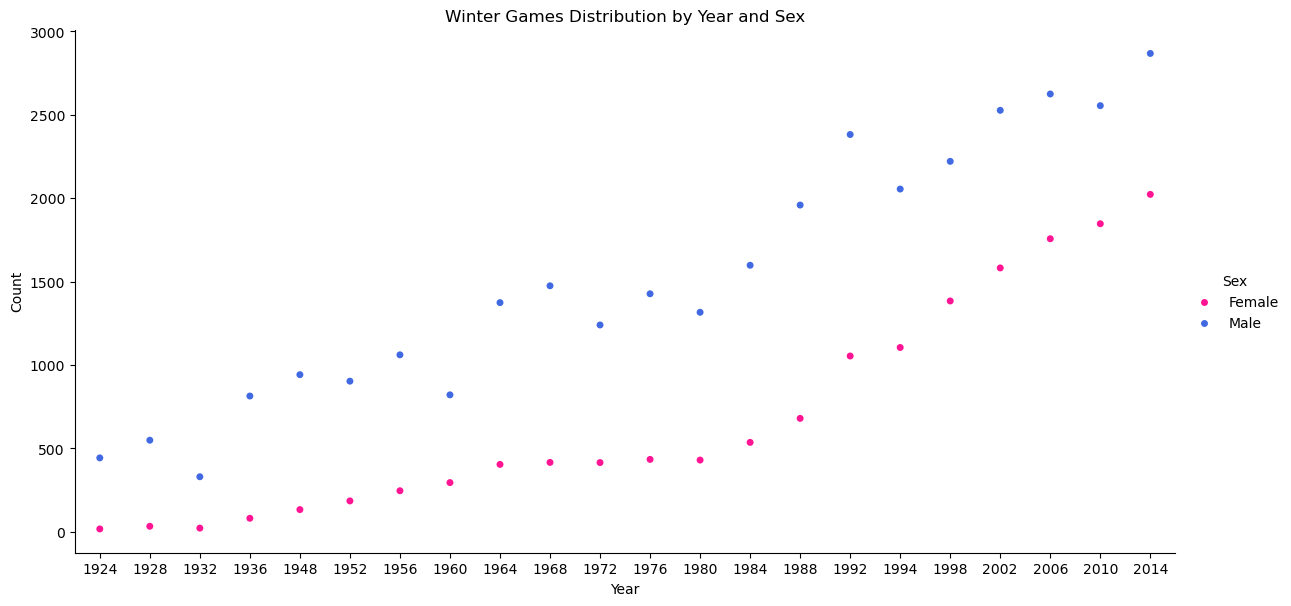

In [697]:
data11 = winter_game.groupby(['Year','Sex']).size().reset_index(name='Count')
data11['Sex'] = data11['Sex'].replace({'F':'Female','M':'Male'})
data11

plt.figure(figsize=(15,6))
sns.catplot(x='Year', y='Count', hue='Sex', data=data11, palette=['deeppink', 'royalblue'], kind='swarm', height=6, aspect=2)

# Display the plot
plt.title('Winter Games Distribution by Year and Sex')
plt.show()

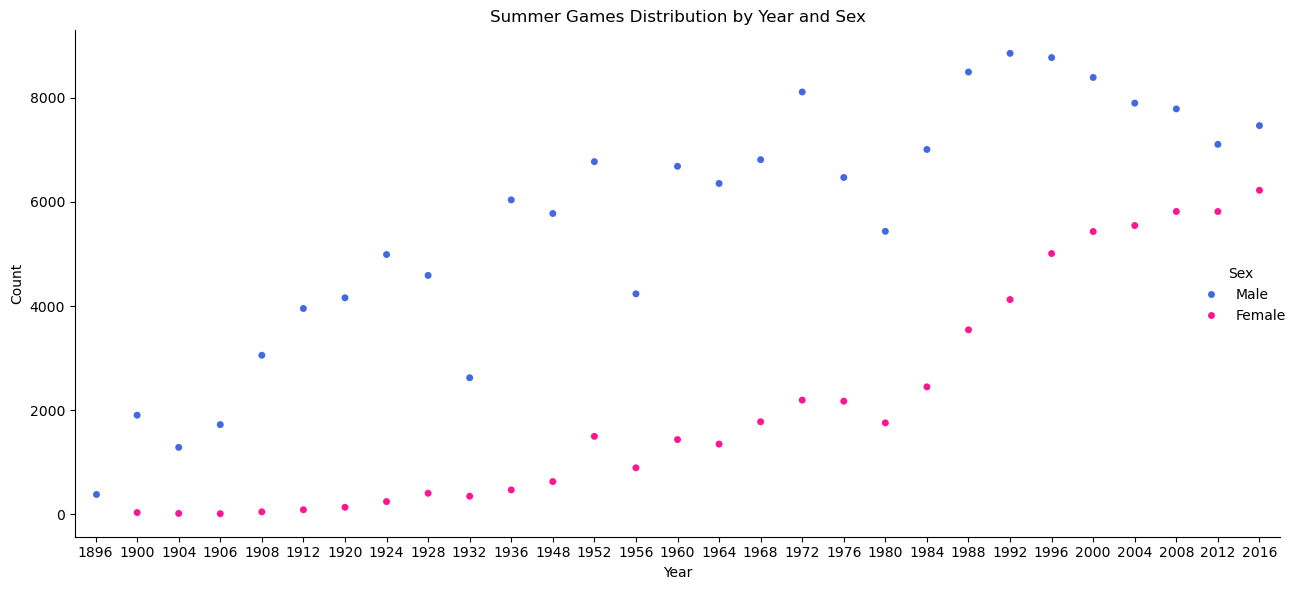

In [733]:
data11 = summer_game.groupby(['Year','Sex']).size().reset_index(name='Count')
data11['Sex'] = data11['Sex'].replace({'F':'Female','M':'Male'})
data11

sns.catplot(x='Year', y='Count', hue='Sex', data=data11, palette=['royalblue', 'deeppink'], kind='swarm', height=6, aspect=2,legend=1)

# Display the plot
plt.title('Summer Games Distribution by Year and Sex')

plt.tight_layout()
plt.show()

<img src="Hulk Taco.png" width="800" height="900"> 

# Insights / Догатки

 1. Есть тенденция то что с каждым годом увеличиваеться кол-во участников Олимпиад
    
 2. С каждым годом кол-во участников женщин приравниваеться к кол-ву мужчинам.
    
 3. Из-за популяций? или женщини хотевшие учавствовать стало много ? или закон участвие олимпиады поменялись?

 4. 🇰🇿 Бокс, Тяжелая Атлетика , Борьба, Легкая отлетика -> виды спорта по которым заваевана больше медалей, Это говарит нам о том что в Казахстане такие виды спорта очен развита и при бюджетирований спорта нужно учитовать эти факты.

 5. 🇰🇿 В Казахстане  Мужчин призеров значительно больше чем Женщин призеров по Олимпиадам.
    
 6. 🇰🇿 22-28 лет большенству призеров Мужчин, в Олимпиаде в Казахстане.

 7. 🇰🇿 20-25 лет большенству призеров Женщин, в Олимпиаде в Казахстане.
    
 8. 🇰🇿 За всю историю Казахстана самая Популярный вид спорта по которым учавствовали в Олимпиадах -> Лижные Гонки
    
 9. 🇰🇿 Процентный выигрышь медалей по спорту Лыжные Гонки очень низок 2-4 % , Нужно что то с этим делать: Принести хорешего тренера, Создать хорошое условие для спортсменам, либо уменшить затраты на этот вид спорта.
     
 10. Кол-во Участников Зимных игр значительно меньше по сравнению c Летними играми.
     
 11. Кол-во Уникальных состезаний в Зимных Игр тоже значительно меньше чем с Летними играми.

 12. Зимные игры начались с 1924 года, Летние начались намного раньше 1896 года.

 13. Между 1936 - 1948 годах, целых 12 лет не провадались Летние и Зимные игры, И между 1912-1920 годах не провадились никакие Игры что свидетельствут о произошедших войнах.
     
 14. США укрепила свое место как самый доминантная страна по кол-ву медалей в период всех олимпиад в этом датасете.
     
 15. Странно но Китай оказалась в 5 месте, по топ 10 стран по кол-во Медалей с 2000 года, хотя их насиление больше чем миллиард человек.
     
 16. Германия в этом топе занимет 3 место но хотя их насиление в момент 2014 году около 81 миллионов человек.Причина может быть они получают много медалей с командных соревнований.
     
 17. Есть некоторые типы соревнований где не нужно соревноватья в суровых и тяжких испытательных спортивных состезаний: Art,Shooting,Tennis.
     
 18. Желание состезатся и увеличение кол-во участников будет очень прибыльным и потенциально может принести очень много денег.
     
 19. Развитие спорта, и как сказал желание состезаться , и в здравая конкуренция потенциально хорошо повлияет на общество.

 20. У Американцев все хорошо с выигрышным процентом медалей: Atchlete -> 30-33% Swimming -> 60-70%, Rowing -> 45-50%,

 21. Но плохо с Gymnastics -> 5-10%